# Full CIFAR-10 in a Glimpse
In this notebook we build a composite image out of the CIFAR-10 catalog. We would like to represent a dog image using only dogs images, etc. 

In [1]:
# Run some setup code for this notebook.
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Load the raw CIFAR-10 data.
sys.path.append('../../data_science/cs231n/assignment1')
from cs231n.data_utils import load_CIFAR10
cifar10_dir = '../../data_science/cs231n/assignment1/cs231n/datasets/cifar-10-python/cifar-10-batches-py/'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])
print(X.shape)
print(y.shape)

(60000, 32, 32, 3)
(60000,)


We eant to represent each image with an rgb triplet value, so we take the median of each channel: 

In [2]:
# X_flat: make vectors for each channel in each image: 
X_flat = X.reshape([X.shape[0],-1,3])
print(X_flat.shape)
# img_char: 
img_char = np.empty([X.shape[0],3])
for img_num in range(X.shape[0]):
    img_char[img_num] = np.median(X_flat[img_num],axis=0)
print(img_char.shape)

(60000, 1024, 3)
(60000, 3)


Example image: 

<IPython.core.display.Javascript object>


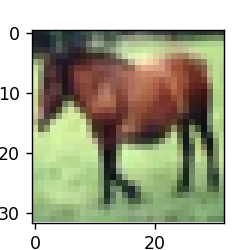

In [3]:
img_num=7
img = X_train[img_num]
cat = y_train[img_num]
plt.figure(figsize=[2,2])
plt.imshow(img.astype('uint8'));

For each pixel in this image, we look for the closest rgb value from the representation we created before. 
We choose to look only on images from the same category. 

The method used here for finding the closest image is Euclidian distance. 

<IPython.core.display.Javascript object>


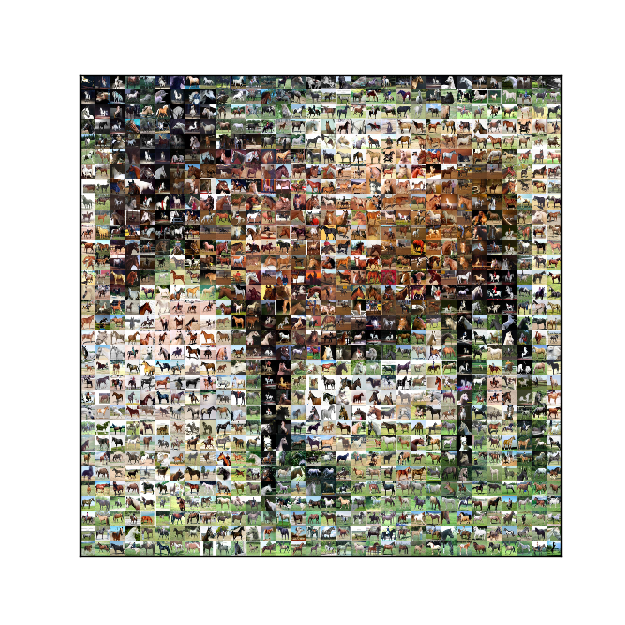

In [4]:
timg_char=img_char[y==cat].copy() #temp image character catalog, only current category
tX = X[y==cat] #temp image catalog, only current category
imsize=32
com_img = np.empty([imsize**2,imsize**2,3]) #composite image intinialization
xind = np.random.choice(imsize, size=imsize, replace=False)
yind = np.random.choice(imsize, size=imsize, replace=False)
for ix in xind:
    for iy in yind:
        idx = np.argmin(((timg_char-img[ix,iy,:])**2).sum(axis=1)) #find the closest image
        com_img[ix*imsize:(ix+1)*imsize, iy*imsize:(iy+1)*imsize] = tX[idx] #fill the aquivalent area of original image with image from the catalog
        timg_char[idx]=np.ones([3,])*1000 #delete used image from catalog without messing with the indecies. the 1000 factor is to make sure it has the longest distance

plt.figure(figsize=[5,5])
plt.imshow(com_img.astype('uint8'));
plt.xticks([]);plt.yticks([]);

Note that in order to avoid using the same image twice we delete each image that have been used from the temporary catalog. This means that if we now try to build an image it would look worse. Here we do it iteratively several times: 

<IPython.core.display.Javascript object>


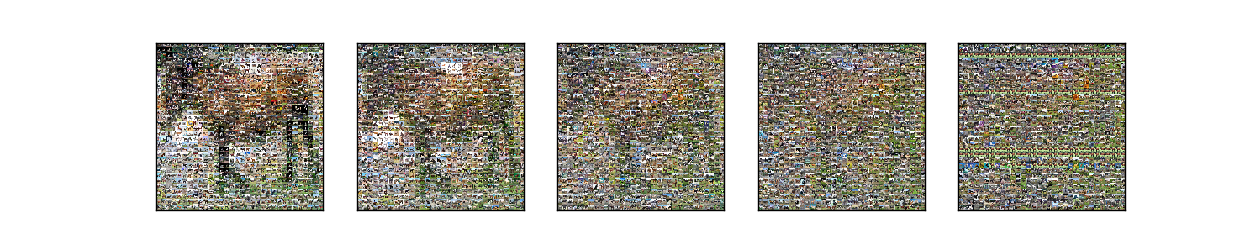

Number of image left: 4976
Number of image left: 3952
Number of image left: 2928
Number of image left: 1904
Number of image left: 880
Number of image left: 0


In [5]:
plt.figure(figsize=[10,2])
for i in range(5):
    print('Number of image left: {}'.format((timg_char.sum(axis=1)<1000).sum()))
    com_img = np.empty([imsize**2,imsize**2,3]) #composite image intinialization
    xind = np.random.choice(imsize, size=imsize, replace=False)
    yind = np.random.choice(imsize, size=imsize, replace=False)
    for ix in xind:
        for iy in yind:
            idx = np.argmin(((timg_char-img[ix,iy,:])**2).sum(axis=1)) #find the closest image
            com_img[ix*imsize:(ix+1)*imsize, iy*imsize:(iy+1)*imsize] = tX[idx] #fill the aquivalent area of original image with image from the catalog
            timg_char[idx]=np.ones([3,])*1000 #delete used image from catalog (without messing with the indecies. the 1000 factor is to make sure it has the longest distance)

    plt.subplot(1,5,i+1)
    plt.imshow(com_img.astype('uint8'));
    plt.xticks([]);plt.yticks([]);
print('Number of image left: {}'.format((timg_char.sum(axis=1)<1000).sum()))